<a href="https://colab.research.google.com/github/dsert1/inria_twitter/blob/main/twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pour regrouper des achats par SCC (Strongly Connected Components) https://www.geeksforgeeks.org/strongly-connected-components/

Deniz Sert
12/06/23

In [5]:
import pandas as pd
import numpy as np

df_adjacency_list = []


# Create dummy data points
data = [
    [1, 2, 100, 10],
    [2, 1, 50, 15],
    [3, 4, 200, 20],
    [4, 5, 150, 25],
    [5, 6, 300, 30],
    [6, 5, 75, 35],
    [7, 8, 250, 40],
    [8, 9, 125, 45],
    [9, 10, 400, 50],
    [10, 11, 175, 55],
    [11, 10, 225, 60],
    [12, 13, 350, 65],
    [13, 14, 275, 70],
    [14, 15, 125, 75],
    [15, 1, 275, 80],
    [16, 17, 150, 85],
    [17, 18, 200, 90],
    [18, 15, 100, 95],
    [19, 2, 400, 100],
    [20, 1, 50, 105]
]

# Create a DataFrame with the dummy data
df_dummy = pd.DataFrame(data, columns=["addr_id1", "addr_id2", "value", "height"]).astype(
    {
        "addr_id1": "UInt32",
        "addr_id2": "UInt32",
        "value": "UInt64",
        "height": "UInt32",
    }
)

# Append the DataFrame to the adjacency list
df_adjacency_list = df_dummy
print(df_adjacency_list)

    addr_id1  addr_id2  value  height
0          1         2    100      10
1          2         1     50      15
2          3         4    200      20
3          4         5    150      25
4          5         6    300      30
5          6         5     75      35
6          7         8    250      40
7          8         9    125      45
8          9        10    400      50
9         10        11    175      55
10        11        10    225      60
11        12        13    350      65
12        13        14    275      70
13        14        15    125      75
14        15         1    275      80
15        16        17    150      85
16        17        18    200      90
17        18        15    100      95
18        19         2    400     100
19        20         1     50     105


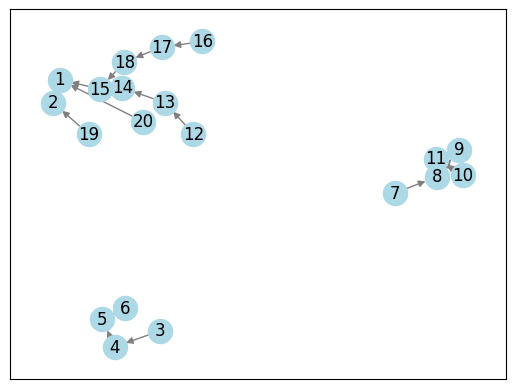

DiGraph with 20 nodes and 20 edges


In [16]:
import networkx as nx
import matplotlib.pyplot as plt

# init empty DAG
dag = nx.DiGraph()

for ix, entry in df_adjacency_list.iterrows():
    source = entry["addr_id1"]
    destination = entry["addr_id2"]
    value = entry["value"]
    height = entry["height"]
    dag.add_edge(source, destination, value=value, height=height)


nx.draw_networkx(dag, with_labels=True, node_color='lightblue', edge_color='gray')
plt.show()
print(dag)

In [ ]:
from collections import defaultdict

def cluster_nodes(adjacency_list):
    dag = create_directed_graph(adjacency_list)
    clusters = identify_clusters(dag)
    
    # Analyze clusters and identify specific characteristics
    
    return clusters

def create_directed_graph(adjacency_list):
    dag = defaultdict(list)
    for entry in adjacency_list:
        source = entry["addr_id1"]
        destination = entry["addr_id2"]
        value = entry["value"]
        height = entry["height"]
        dag[source].append((destination, value, height))
    
    return dag

def identify_clusters(dag):
    # Use Strongly Connected Components (SCC) algorithm
    # to identify clusters within the DAG
    clusters = []
    
    # Implement SCC algorithm here
    
    return clusters

In [ ]:
#  df_adjacency_list.append(
#              pd.DataFrame(
#                  adjacency, columns=["addr_id1", "addr_id2", "value",
# "height"]
#              ).astype(
#                  {
#                      "addr_id1": "UInt32",
#                      "addr_id2": "UInt32",
#                      "value": "UInt64",
#                      "height": "UInt32",
#                  }
#              )
#          )

# 1.5B unique address
# 10B tuples

## SCC peut été implementé par l’algorithme de Tarjan

In [ ]:
def tarjans_algorithm(graph):
    index_counter = [0]
    stack = []
    lowlink = {}
    index = {}
    result = []

    def strongconnect(node):
        # Set the depth index for the current node to the smallest unused index
        index[node] = index_counter[0]
        lowlink[node] = index_counter[0]
        index_counter[0] += 1
        stack.append(node)

        # Consider successors of the current node
        for successor in graph[node]:
            if successor not in index:
                # Successor has not yet been visited; recursively call strongconnect
                strongconnect(successor)
                lowlink[node] = min(lowlink[node], lowlink[successor])
            elif successor in stack:
                # The successor is in the stack and hence in the current strongly connected component
                lowlink[node] = min(lowlink[node], index[successor])

        # If node is a root node, pop the stack and generate an SCC
        if lowlink[node] == index[node]:
            scc = []
            while True:
                successor = stack.pop()
                scc.append(successor)
                if successor == node:
                    break
            result.append(scc)

    # Call the strongconnect function for each node in the graph
    for node in graph:
        if node not in index:
            strongconnect(node)

    return result




# Assuming `dag` is the directed graph generated from the adjacency list
clusters = tarjans_algorithm(dag)

# Analyze and process the clusters
for cluster in clusters:
    # Perform specific analysis or actions on each cluster
    # For example, check if the cluster consists mainly of nodes with only outgoing edges
    # and label them as Bitcoin miners or any other identified group
    if all(len(dag[node]) > 0 for node in cluster):
        print("Cluster is likely Bitcoin miners:", cluster)
    else:
        print("Cluster:", cluster)